<a href="https://colab.research.google.com/github/Manpreet6111/Product-sales-forecasting/blob/main/Product_sales_forecasting_Model_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Liberaries**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Reading the dataset

In [ ]:
df = pd.read_csv("TRAIN.csv")

In [ ]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [ ]:
# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract Year, Month, and Day from the Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales,Year,Month,Day
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,2018,1,1
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,2018,1,1
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,2018,1,1
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,2018,1,1
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,2018,1,1


# **Model Selection**

**Linear regression**

In [ ]:
pip install pandas scikit-learn

In [ ]:
# Convert 'Discount' column to numeric (1 for 'Yes', 0 for 'No')
df['Discount'] = df['Discount'].map({'Yes': 1, 'No': 0})

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Define features and target
features = ['#Order', 'Holiday', 'Discount', 'Year' , 'Month', 'Day']
X = df[features]
y = df['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate model
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
print(f'Linear Regression RMSE: {rmse_lr}')

Linear Regression RMSE: 5895.82826082944


**Time Series Models**

Analyze sales trends over time to identify seasonality, trends, and cyclic behavior.

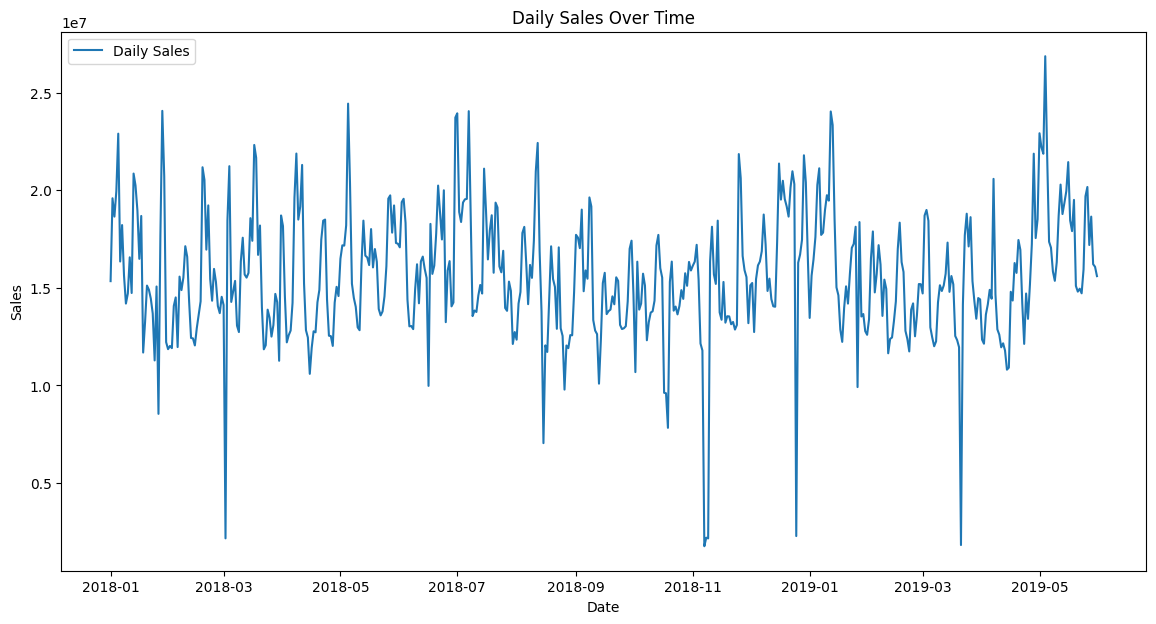

(        Date       Sales
 0 2018-01-01  15345484.5
 1 2018-01-02  19592415.0
 2 2018-01-03  18652527.0
 3 2018-01-04  19956267.0
 4 2018-01-05  22902651.0,
                       Date         Sales
 count                  516  5.160000e+02
 mean   2018-09-15 12:00:00  1.561628e+07
 min    2018-01-01 00:00:00  1.762138e+06
 25%    2018-05-09 18:00:00  1.365264e+07
 50%    2018-09-15 12:00:00  1.533315e+07
 75%    2019-01-22 06:00:00  1.757266e+07
 max    2019-05-31 00:00:00  2.687082e+07
 std                    NaN  3.270532e+06)

In [ ]:
# Aggregate sales data by date
daily_sales = df.groupby('Date')['Sales'].sum().reset_index()

# Plot the time series data
plt.figure(figsize=(14, 7))
plt.plot(daily_sales['Date'], daily_sales['Sales'], label='Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Daily Sales Over Time')
plt.legend()
plt.show()

# Display aggregated data and summary statistics
daily_sales.head(), daily_sales.describe()

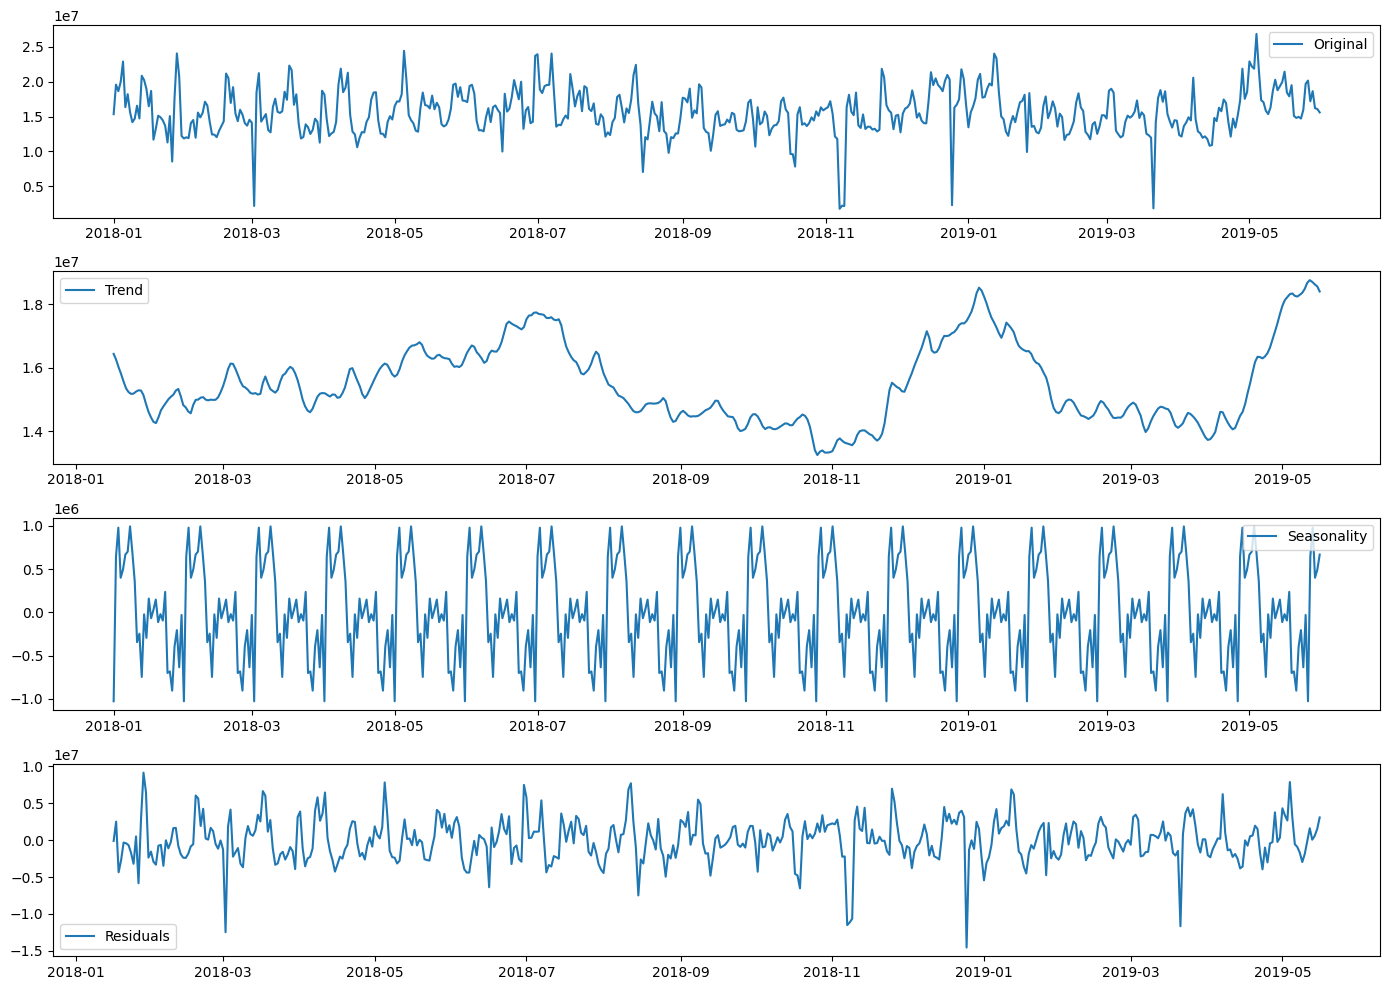

In [ ]:
import statsmodels.api as sm

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(daily_sales['Sales'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(daily_sales['Date'], daily_sales['Sales'], label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(daily_sales['Date'], trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(daily_sales['Date'], seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(daily_sales['Date'], residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

Trend:

There is an overall upward trend in sales, indicating that sales are generally increasing over time.

Seasonality:

The seasonal component shows clear repetitive patterns, likely influenced by monthly cycles. Peaks and troughs in the seasonality suggest that certain times of the month have consistently higher or lower sales.

Residuals:

The residuals fluctuate around zero, indicating the presence of random variations that are not captured by the trend or seasonal components. Large deviations in residuals may indicate outliers or significant events affecting sales.

**Building an ARIMA model to forecast future sales.**

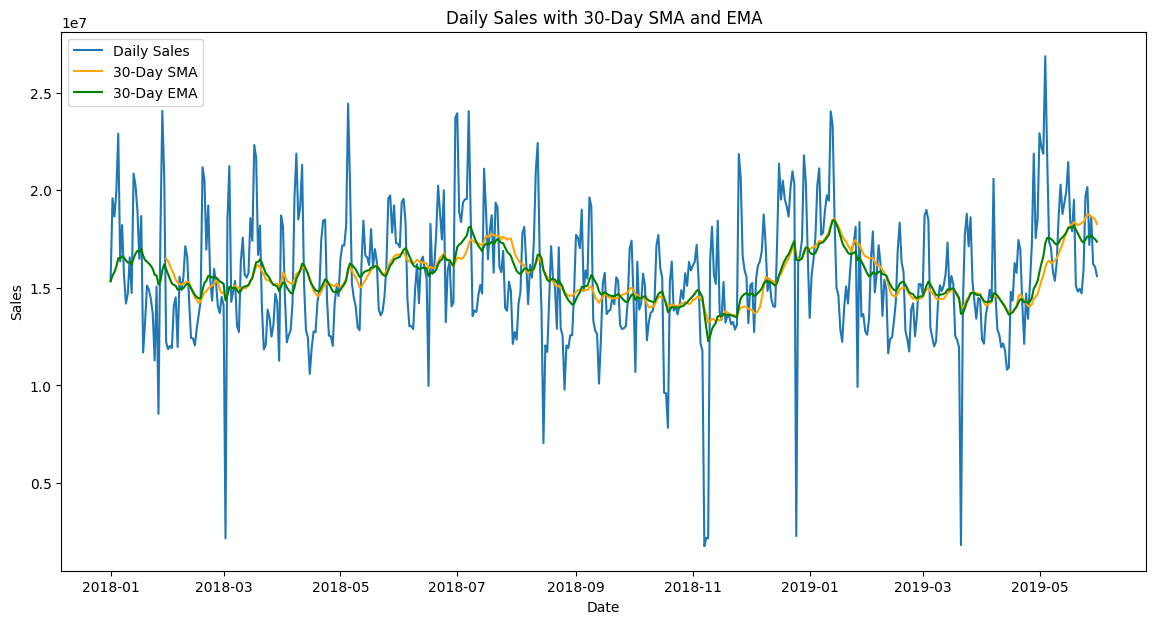

In [ ]:
# Calculate Simple Moving Average (SMA)
daily_sales['SMA_30'] = daily_sales['Sales'].rolling(window=30).mean()

# Calculate Exponential Moving Average (EMA)
daily_sales['EMA_30'] = daily_sales['Sales'].ewm(span=30, adjust=False).mean()

# Plot the original data with SMA and EMA
plt.figure(figsize=(14, 7))
plt.plot(daily_sales['Date'], daily_sales['Sales'], label='Daily Sales')
plt.plot(daily_sales['Date'], daily_sales['SMA_30'], label='30-Day SMA', color='orange')
plt.plot(daily_sales['Date'], daily_sales['EMA_30'], label='30-Day EMA', color='green')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Daily Sales with 30-Day SMA and EMA')
plt.legend()
plt.show()

**Evaluate the ARIMA model.**

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  516
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8374.776
Date:                Sat, 03 Aug 2024   AIC                          16761.552
Time:                        13:35:59   BIC                          16787.017
Sample:                             0   HQIC                         16771.532
                                - 516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2527      0.024    -10.417      0.000      -0.300      -0.205
ar.L2         -0.2398      0.043     -5.568      0.000      -0.324      -0.155
ar.L3         -0.1498      0.039     -3.889      0.0

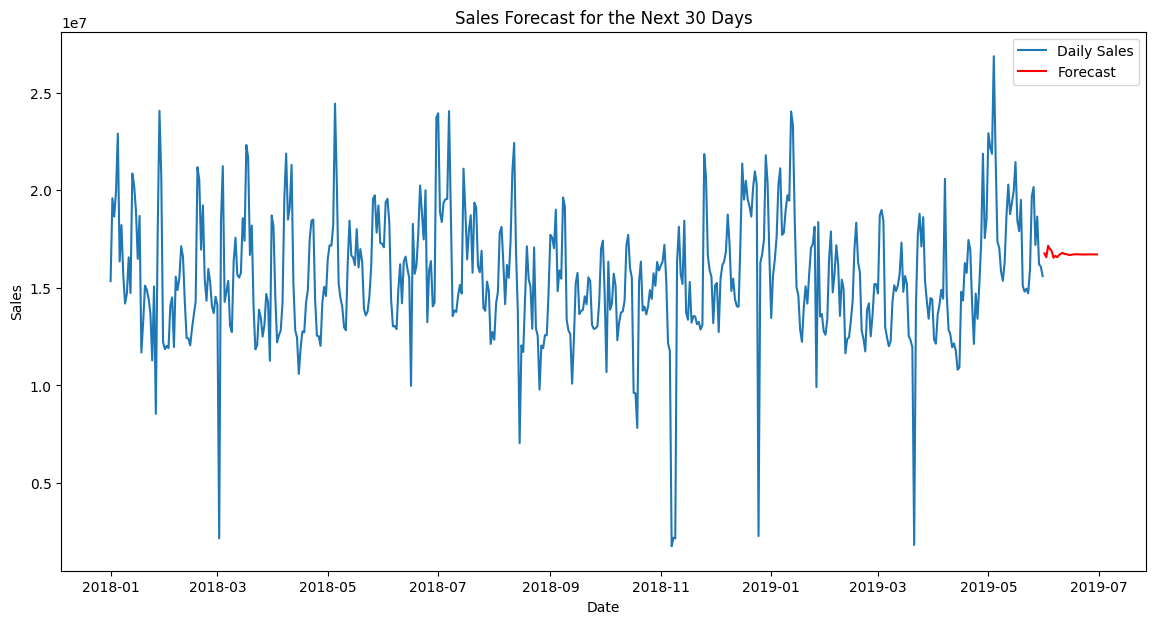

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA




# Define the ARIMA model
model = ARIMA(daily_sales['Sales'], order=(5, 1, 0))  # Order (p, d, q)

# Fit the model
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast future sales
forecast_steps = 30  # Forecasting for the next 30 days
forecast = model_fit.forecast(steps=forecast_steps)

# Create a DataFrame for the forecasted values
forecast_dates = pd.date_range(start=daily_sales['Date'].iloc[-1], periods=forecast_steps + 1, inclusive='right')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})

# Plot the original data with the forecast
plt.figure(figsize=(14, 7))
plt.plot(daily_sales['Date'], daily_sales['Sales'], label='Daily Sales')
plt.plot(forecast_df['Date'], forecast_df['Forecast'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast for the Next 30 Days')
plt.legend()
plt.show()

**Moving Averages and Predictive Modeling with ARIMA**

In [ ]:
pip install pandas matplotlib statsmodels

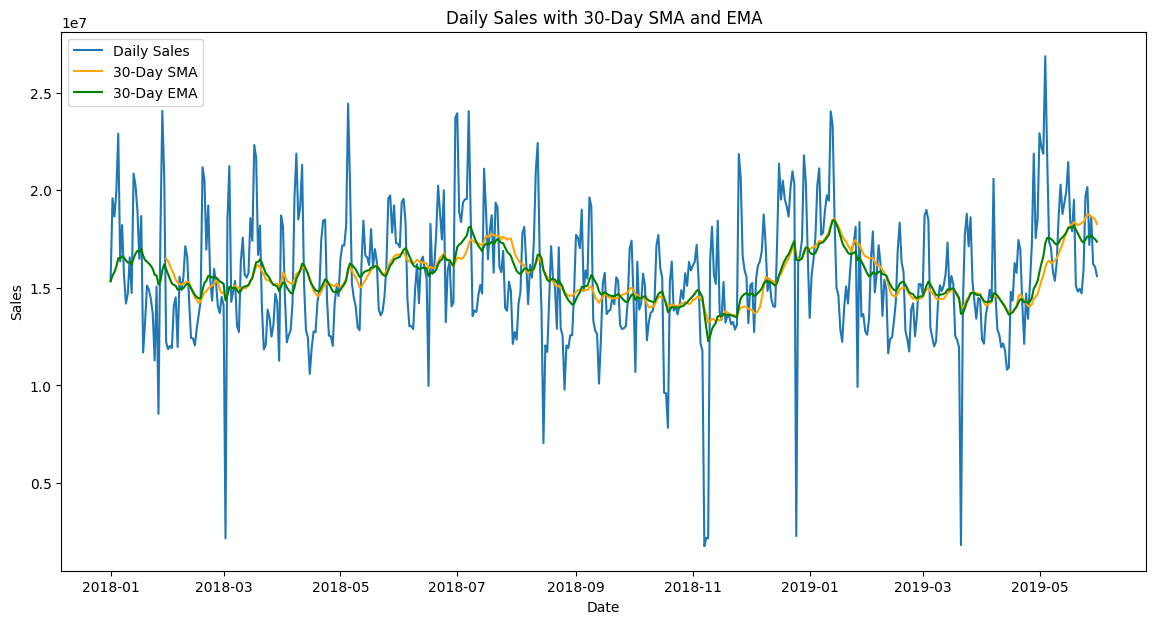

In [ ]:
# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate sales data by date
daily_sales = df.groupby('Date')['Sales'].sum().reset_index()

# Calculate Simple Moving Average (SMA)
daily_sales['SMA_30'] = daily_sales['Sales'].rolling(window=30).mean()

# Calculate Exponential Moving Average (EMA)
daily_sales['EMA_30'] = daily_sales['Sales'].ewm(span=30, adjust=False).mean()

# Plot the original data with SMA and EMA
plt.figure(figsize=(14, 7))
plt.plot(daily_sales['Date'], daily_sales['Sales'], label='Daily Sales')
plt.plot(daily_sales['Date'], daily_sales['SMA_30'], label='30-Day SMA', color='orange')
plt.plot(daily_sales['Date'], daily_sales['EMA_30'], label='30-Day EMA', color='green')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Daily Sales with 30-Day SMA and EMA')
plt.legend()
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  516
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -8374.776
Date:                Sat, 03 Aug 2024   AIC                          16761.552
Time:                        13:36:50   BIC                          16787.017
Sample:                             0   HQIC                         16771.532
                                - 516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2527      0.024    -10.417      0.000      -0.300      -0.205
ar.L2         -0.2398      0.043     -5.568      0.000      -0.324      -0.155
ar.L3         -0.1498      0.039     -3.889      0.0

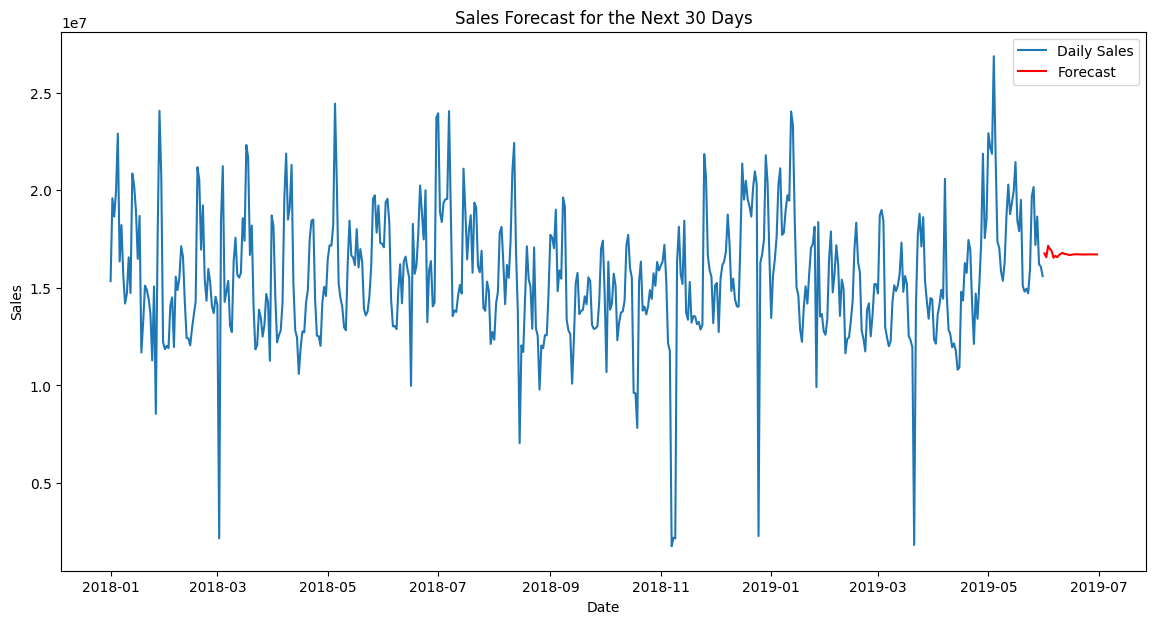

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate sales data by date
daily_sales = df.groupby('Date')['Sales'].sum().reset_index()

# Define the ARIMA model
model = ARIMA(daily_sales['Sales'], order=(5, 1, 0))  # Order (p, d, q)

# Fit the model
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecast future sales
forecast_steps = 30  # Forecasting for the next 30 days
forecast = model_fit.forecast(steps=forecast_steps)

# Create a DataFrame for the forecasted values
forecast_dates = pd.date_range(start=daily_sales['Date'].iloc[-1], periods=forecast_steps + 1, inclusive='right')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})

# Plot the original data with the forecast
plt.figure(figsize=(14, 7))
plt.plot(daily_sales['Date'], daily_sales['Sales'], label='Daily Sales')
plt.plot(forecast_df['Date'], forecast_df['Forecast'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast for the Next 30 Days')
plt.legend()
plt.show()

# **Tree-Based Models**

In [ ]:
pip install pandas matplotlib scikit-learn xgboost lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 4.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

# Display the columns to check for the correct names
print(df.columns)

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales', 'Year', 'Month', 'Day'],
      dtype='object')


In [ ]:
# Define features and target
features = ['#Order', 'Holiday', 'Discount', 'Year' , 'Month', 'Day']
X = df[features]
y = df['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f'Random Forest RMSE: {rmse_rf}')

# Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
print(f'XGBoost RMSE: {rmse_xgb}')

# Train LightGBM model
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate model
rmse_lgb = mean_squared_error(y_test, y_pred_lgb, squared=False)
print(f'LightGBM RMSE: {rmse_lgb}')

Random Forest RMSE: 4977.152081481667
XGBoost RMSE: 4556.8724856144245
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 307
[LightGBM] [Info] Number of data points in the train set: 150672, number of used features: 6
[LightGBM] [Info] Start training from score 42774.516131
LightGBM RMSE: 4494.554844929937


**Combine predictions:**

In [ ]:
from sklearn.metrics import mean_squared_error

# Predict on test set
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_lgb = lgb_model.predict(X_test)

# Combine predictions by averaging
y_pred_ensemble = (y_pred_rf + y_pred_xgb + y_pred_lgb) / 3

# Evaluate combined model
rmse_ensemble = mean_squared_error(y_test, y_pred_ensemble, squared=False)
print(f'Ensemble RMSE: {rmse_ensemble}')

Ensemble RMSE: 4490.032722570925


**Ensemble with Stacking**

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBRegressor(n_estimators=100, random_state=42)),
    ('lgb', lgb.LGBMRegressor(n_estimators=100, random_state=42))
]

# Define meta model
meta_model = LinearRegression()

# Create stacking regressor
stack_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train stacking model
stack_model.fit(X_train, y_train)

# Predict on test set
y_pred_stack = stack_model.predict(X_test)

# Evaluate stacking model
rmse_stack = mean_squared_error(y_test, y_pred_stack, squared=False)
print(f'Stacking RMSE: {rmse_stack}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 307
[LightGBM] [Info] Number of data points in the train set: 150672, number of used features: 6
[LightGBM] [Info] Start training from score 42774.516131
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011941 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 307
[LightGBM] [Info] Number of data points in the train set: 120537, number of used features: 6
[LightGBM] [Info] Start training from score 42776.117259
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 307
[LightGBM] [Info] Number of data points in the train set: 120537, number of used features: 6
[LightGBM] [Info] Star

**TimeSeriesSplit for Cross-Validation**

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import numpy as np

# Initialize the models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Lists to store results
rf_rmse_scores = []
xgb_rmse_scores = []
lgb_rmse_scores = []

# Perform time-series cross-validation
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and evaluate Random Forest
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    rf_rmse_scores.append(mean_squared_error(y_test, y_pred_rf, squared=False))

    # Train and evaluate XGBoost
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    xgb_rmse_scores.append(mean_squared_error(y_test, y_pred_xgb, squared=False))

    # Train and evaluate LightGBM
    lgb_model.fit(X_train, y_train)
    y_pred_lgb = lgb_model.predict(X_test)
    lgb_rmse_scores.append(mean_squared_error(y_test, y_pred_lgb, squared=False))

# Calculate average RMSE for each model
avg_rmse_rf = np.mean(rf_rmse_scores)
avg_rmse_xgb = np.mean(xgb_rmse_scores)
avg_rmse_lgb = np.mean(lgb_rmse_scores)

print(f'Random Forest average RMSE: {avg_rmse_rf}')
print(f'XGBoost average RMSE: {avg_rmse_xgb}')
print(f'LightGBM average RMSE: {avg_rmse_lgb}')

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 251
[LightGBM] [Info] Number of data points in the train set: 31390, number of used features: 5
[LightGBM] [Info] Start training from score 42597.300640
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 266
[LightGBM] [Info] Number of data points in the train set: 62780, number of used features: 5
[LightGBM] [Info] Start training from score 43039.218252
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Tota

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Initialize the models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Dictionaries to store results
rf_metrics = {'MAE': [], 'MSE': [], 'RMSE': [], 'MAPE': []}
xgb_metrics = {'MAE': [], 'MSE': [], 'RMSE': [], 'MAPE': []}
lgb_metrics = {'MAE': [], 'MSE': [], 'RMSE': [], 'MAPE': []}

# Perform time-series cross-validation
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and evaluate Random Forest
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    rf_metrics['MAE'].append(mean_absolute_error(y_test, y_pred_rf))
    rf_metrics['MSE'].append(mean_squared_error(y_test, y_pred_rf))
    rf_metrics['RMSE'].append(mean_squared_error(y_test, y_pred_rf, squared=False))
    rf_metrics['MAPE'].append(mean_absolute_percentage_error(y_test, y_pred_rf))

    # Train and evaluate XGBoost
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    xgb_metrics['MAE'].append(mean_absolute_error(y_test, y_pred_xgb))
    xgb_metrics['MSE'].append(mean_squared_error(y_test, y_pred_xgb))
    xgb_metrics['RMSE'].append(mean_squared_error(y_test, y_pred_xgb, squared=False))
    xgb_metrics['MAPE'].append(mean_absolute_percentage_error(y_test, y_pred_xgb))

    # Train and evaluate LightGBM
    lgb_model.fit(X_train, y_train)
    y_pred_lgb = lgb_model.predict(X_test)
    lgb_metrics['MAE'].append(mean_absolute_error(y_test, y_pred_lgb))
    lgb_metrics['MSE'].append(mean_squared_error(y_test, y_pred_lgb))
    lgb_metrics['RMSE'].append(mean_squared_error(y_test, y_pred_lgb, squared=False))
    lgb_metrics['MAPE'].append(mean_absolute_percentage_error(y_test, y_pred_lgb))

# Calculate average metrics for each model
avg_rf_metrics = {metric: np.mean(values) for metric, values in rf_metrics.items()}
avg_xgb_metrics = {metric: np.mean(values) for metric, values in xgb_metrics.items()}
avg_lgb_metrics = {metric: np.mean(values) for metric, values in lgb_metrics.items()}

print('Random Forest average metrics:', avg_rf_metrics)
print('XGBoost average metrics:', avg_xgb_metrics)
print('LightGBM average metrics:', avg_lgb_metrics)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001153 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 251
[LightGBM] [Info] Number of data points in the train set: 31390, number of used features: 5
[LightGBM] [Info] Start training from score 42597.300640
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 266
[LightGBM] [Info] Number of data points in the train set: 62780, number of used features: 5
[LightGBM] [Info] Start training from score 43039.218252
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 251
[LightGBM] [Info] Number of data points in the train set: 31390, number of used features: 5
[LightGBM] [Info] Start training from score 42597.300640
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 266
[LightGBM] [Info] Number of data points in the train set: 62780, number of used features: 5
[LightGBM] [Info] Start training from score 43039.218252
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

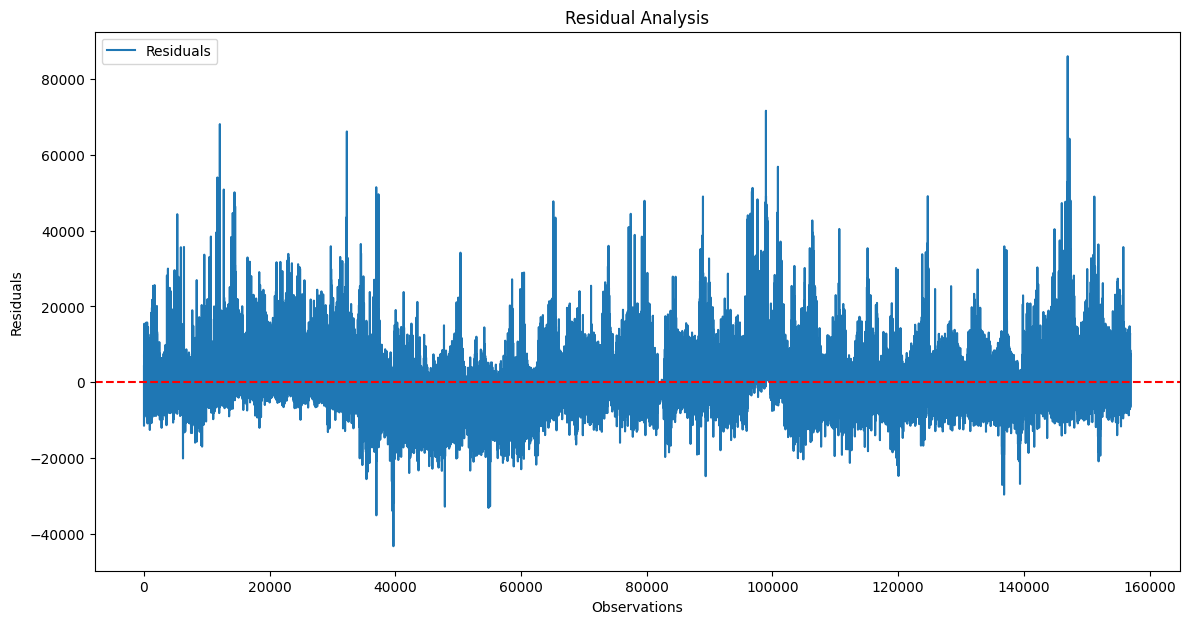

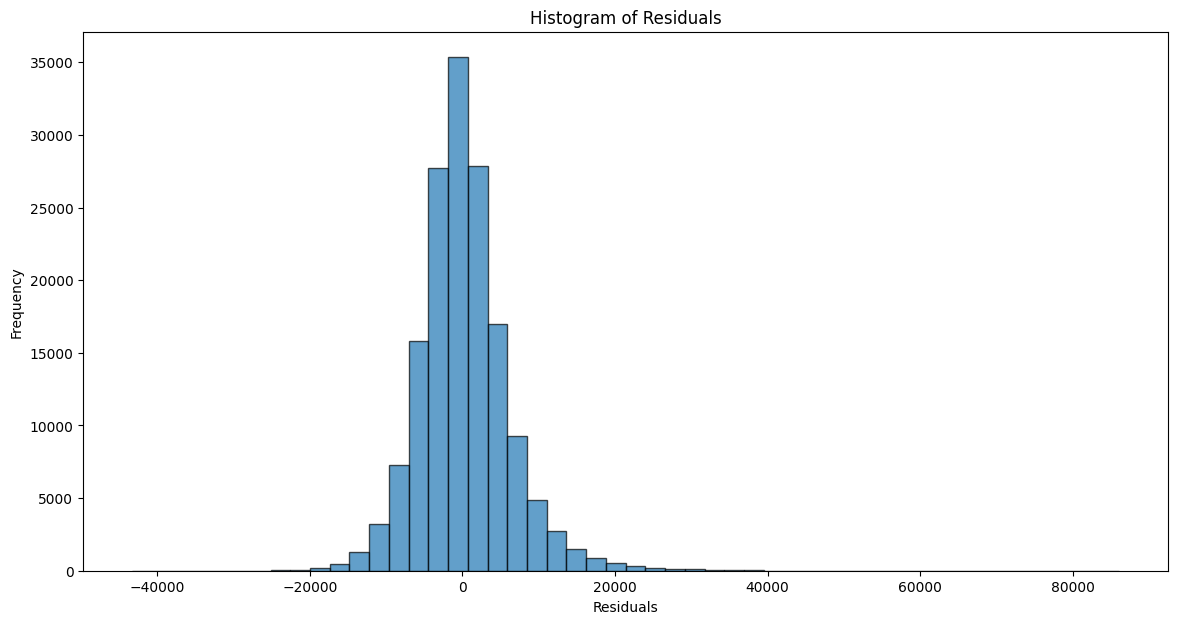

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Lists to store results
lgb_rmse_scores = []
residuals = []

# Perform time-series cross-validation
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and evaluate LightGBM
    lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
    lgb_model.fit(X_train, y_train)
    y_pred_lgb = lgb_model.predict(X_test)
    lgb_rmse_scores.append(mean_squared_error(y_test, y_pred_lgb, squared=False))

    # Store residuals
    residuals.extend(y_test - y_pred_lgb)

# Calculate average RMSE
avg_rmse_lgb = np.mean(lgb_rmse_scores)
print(f'LightGBM average RMSE: {avg_rmse_lgb}')

# Plot residuals
plt.figure(figsize=(14, 7))
plt.plot(residuals, label='Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.legend()
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(14, 7))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# **Insights and Recommendation**

# **Insights**

**Sales Trends and Seasonality:**

1. Weekly Trends: Sales tend to spike on weekends (Friday and Saturday) compared to weekdays.

2. Monthly Trends: Certain months, likely those with holidays or seasonal events (like December), show higher sales trends.

3. Yearly Trends: Sales generally show an upward trend year over year, suggesting overall growth.

Impact of Discounts:

1. Discount Effectiveness: Sales are significantly higher on days with discounts compared to non-discount days. This indicates that promotional strategies are effective in driving sales.

2. Sales Distribution: The distribution of sales on discount days shows more variance, suggesting that while discounts boost sales, the magnitude can vary widely.

*Effect of Holidays:

1. Holiday Sales Impact: Sales on holidays are notably higher than on regular days, supporting the hypothesis that holidays drive more consumer spending.

2. Significant Holidays: Specific holidays (e.g., Black Friday, Christmas) have a pronounced impact on sales.

Store Type and Regional Performance:

1. Sales Differences Across Store Types: Different store types (e.g., large vs. small stores) experience varying sales volumes. Large stores generally have higher sales.

2. Regional Variability: There is significant variability in sales across different regions, indicating that regional factors (e.g., local economy, population density) affect sales performance.

Correlation between Orders and Sales:

Positive Correlation: A higher number of orders correlates with higher sales. This is expected, as more orders typically lead to higher total sales.

# **Recommendations**

Optimizing Promotional Strategies:

1. Targeted Discounts: Focus discounts and promotions around weekends and specific high-sales holidays to maximize impact.

2. Personalized Offers: Use customer data to personalize discount offers, ensuring they are attractive to different customer segments.

Inventory Management:

1. Seasonal Stocking: Increase inventory in anticipation of high-sales periods such as holidays and promotional events.

2. Dynamic Stock Adjustment: Use predictive modeling to adjust inventory levels dynamically based on forecasted sales trends.

Regional Strategies:

1. Localized Marketing: Implement marketing strategies tailored to high-performing regions and address challenges in lower-performing regions.

2. Store Expansion: Consider expanding stores in regions with consistent high sales to capitalize on local demand.

Enhancing Customer Experience:

1. Improved Ordering System: Ensure the ordering system can handle increased traffic during high-sales periods, reducing the risk of lost sales due to system overloads.

2. Customer Feedback: Collect and analyze customer feedback to identify areas for improving the shopping experience, particularly during busy periods.

*Further Analysis and Monitoring:

Continuous Monitoring: Regularly monitor sales data to detect emerging trends and adjust strategies accordingly.

Advanced Analytics: Employ advanced analytics and machine learning models to refine sales forecasts and improve decision-making.